# 2019.05.22_1_머신러닝

### 임포트

In [79]:
import pandas as pd ###판다스
from sklearn.neighbors import KNeighborsClassifier ###KNN
from sklearn.metrics import accuracy_score ###정답률 보기
import seaborn as sns ###시각화

# KNN - XOR

In [20]:
col = ["P", "Q", "PxorQ"]
index = [0,
         1,
         2,
         3]
xor = [[0, 0, 0],
       [0, 1, 1],
       [1, 0, 1],
       [1, 1, 0]]

In [21]:
xor_df = pd.DataFrame(xor, index, columns=col)
xor_df

,P,Q,PxorQ
0,0,0,0
1,0,1,1
2,1,0,1
3,1,1,0


In [50]:
### 문제
xor_data = xor_df.iloc[:, :2]
xor_data

,P,Q
0,0,0
1,0,1
2,1,0
3,1,1


In [51]:
###답
xor_label = xor_df.iloc[:, 2]
xor_label

0    0
1    1
2    1
3    0
Name: PxorQ, dtype: int64

### 모델만들기(생성)

In [42]:
knn = KNeighborsClassifier(n_neighbors=1)

### 학습(문제, 답)

In [49]:
knn.fit(xor_data, xor_label)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

### 예측(내가 만든 문제)

In [54]:
pre = knn.predict(xor_data)
pre

array([0, 1, 1, 0], dtype=int64)

### 정답률(실제답, 예측치)

In [58]:
accuracy_score(xor_label, pre)

1.0

# KNN - BMI

### 1. 문제 정의

##### 키와 몸무게를 가지고 BMI를 예측
    지도학습중 분류에 해당

### 2. 데이터수집

In [85]:
data = pd.read_csv("bmi.csv")

In [86]:
data.shape

(20001, 3)

In [87]:
data.head()

,height,weight,label
0,140,45,normal
1,145,72,fat
2,150,61,fat
3,137,56,fat
4,192,48,thin


In [88]:
data["label"].value_counts()

fat          7712
thin         6338
normal       5950
DaegeunOh       1
Name: label, dtype: int64

In [89]:
data["label"]

0           normal
1              fat
2              fat
3              fat
4             thin
5              fat
6           normal
7             thin
8             thin
9             thin
10            thin
11            thin
12          normal
13             fat
14            thin
15             fat
16          normal
17          normal
18            thin
19          normal
20             fat
21             fat
22             fat
23          normal
24          normal
25          normal
26            thin
27          normal
28            thin
29             fat
           ...    
19971       normal
19972          fat
19973       normal
19974          fat
19975       normal
19976       normal
19977          fat
19978          fat
19979         thin
19980         thin
19981         thin
19982          fat
19983         thin
19984       normal
19985       normal
19986          fat
19987       normal
19988         thin
19989         thin
19990          fat
19991          fat
19992       

### 3. 전처리

In [90]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20001 entries, 0 to 20000
Data columns (total 3 columns):
height    20001 non-null int64
weight    20001 non-null int64
label     20001 non-null object
dtypes: int64(2), object(1)
memory usage: 468.9+ KB


### 4. 탐색적 데이터 분석(EDA)

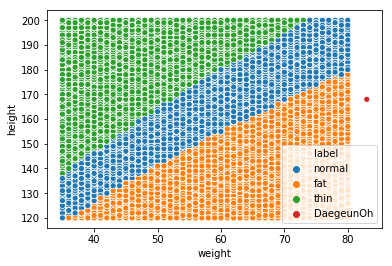

In [91]:
sns.scatterplot(data=data, x='weight', y='height', hue='label')

### 